In [41]:
library(imager)
library(SynchWave)
library(dplyr)

In [44]:
# Define a function to show face images ####
showImage <- function(x) {
  x %>%
  apply(2, rev) %>% #Rotate matrix by 90 degrees, step one : reverse columns 
  t %>% # Rotate matrix by 90 degrees, step two: transpose matrix
  image(col=grey(seq(0, 1, length=256)), xaxt="n", yaxt="n") # 256 diffrent intensities between 0 and 1 defined
}

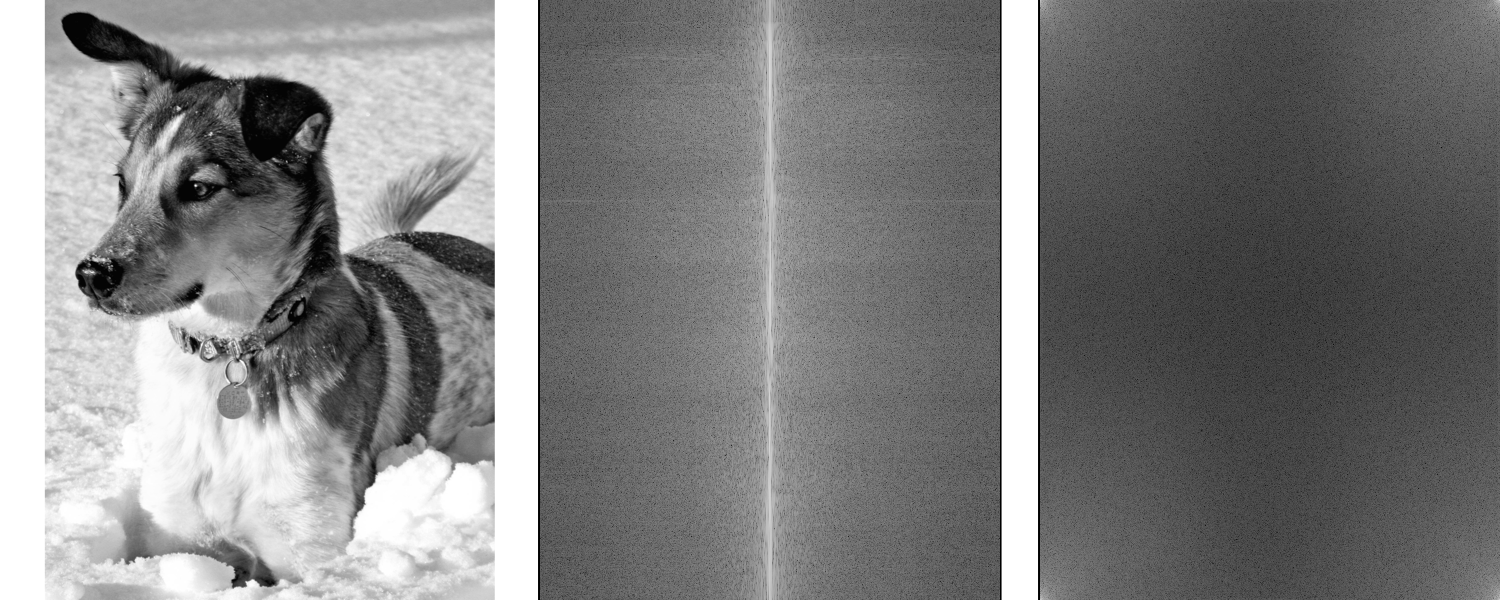

In [53]:
#Load Image
A = load.image("../DATA/dog.jpg")

#Convert to grayscale image
X = grayscale(A)

nx = width(X)
ny = height(X)

Cshift <- matrix(as.complex(rep(0, nx*ny)), nrow=nx, ncol=ny)
C <- matrix(as.complex(rep(0, nx*ny)), nrow=nx, ncol=ny)

for (j in 1:nx) {
  Cshift[j,] = fftshift(fft(X[j,]))
  C[j,] = fft(X[j,])    
}

im_fft <- as.matrix(log(abs(Cshift)))


#Plot it
options(repr.plot.width = 5, repr.plot.height = 2, repr.plot.res = 300)
par(mfrow = c(1, 3), mar=c(0, 1, 0, 0))
plot(X, axes=FALSE)
showImage(im_fft)

# 2D FFT-Transform
# Compute column-wise FFT
D <- matrix(as.complex(rep(0, nx*ny)), nrow=nx, ncol=ny)

for (j in 1:ny) {
  D[,j] = fft(C[,j])
}

im_fft2d <- as.matrix(log(abs(D)))
showImage(im_fft2d)